# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | villa regina
Processing Record 2 of Set 1 | bel ombre
Processing Record 3 of Set 1 | maryville
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | wailua homesteads
Processing Record 6 of Set 1 | tacuarembo
Processing Record 7 of Set 1 | beyneu
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | kamenka
Processing Record 10 of Set 1 | at taj
Processing Record 11 of Set 1 | neya
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | toliara
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | heniches'k
Processing Record 19 of Set 1 | lambarene
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | devils lake
Processing Record 22 of Set 1 | port-aux-francais
Proc

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# lats = city_data_df["Lat"]
# max_temps = city_data_df["Max Temp"]
# humidity = city_data_df["Humidity"]
# cloudiness = city_data_df["Cloudiness"]
# wind_speed = city_data_df["Windspeed"]

# city_data_df.to_csv(output_data_file, index_label = "City_ID")

# Show Record Count
city_data_df.count() 

# Display sample data
city_data_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,villa regina,-39.1000,-67.0667,297.58,23,74,3.13,AR,1737171234
1,bel ombre,-4.6167,55.4167,299.06,89,40,2.06,SC,1737171236
2,maryville,35.7565,-83.9705,279.87,68,100,0.00,US,1737171237
3,adamstown,-25.0660,-130.1015,297.95,88,6,4.71,PN,1737171238
4,wailua homesteads,22.0669,-159.3780,296.59,76,0,7.20,US,1737171198


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa regina,-39.1000,-67.0667,297.58,23,74,3.13,AR,1737171234
1,bel ombre,-4.6167,55.4167,299.06,89,40,2.06,SC,1737171236
2,maryville,35.7565,-83.9705,279.87,68,100,0.00,US,1737171237
3,adamstown,-25.0660,-130.1015,297.95,88,6,4.71,PN,1737171238
4,wailua homesteads,22.0669,-159.3780,296.59,76,0,7.20,US,1737171198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

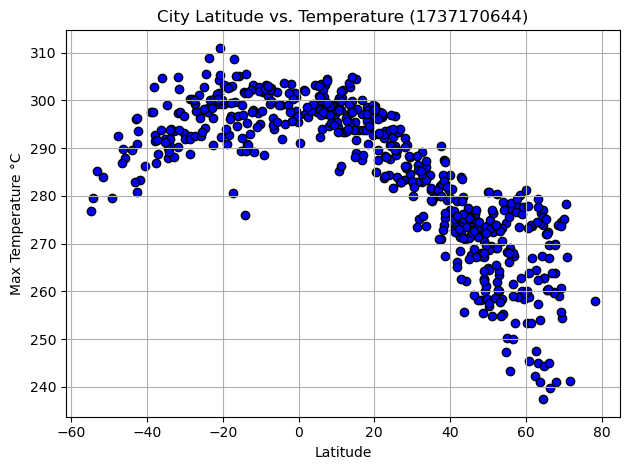

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

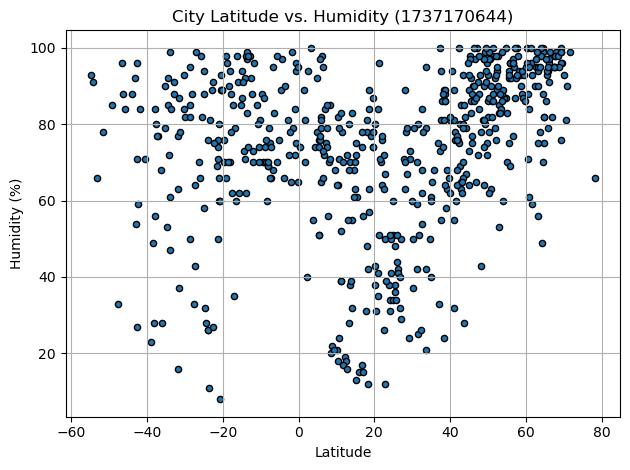

In [23]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

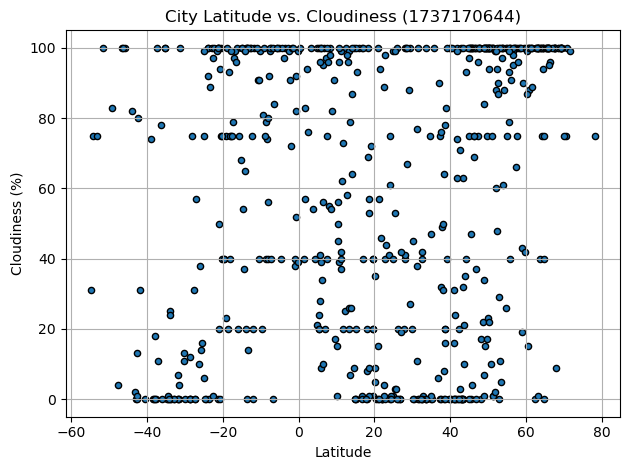

In [24]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

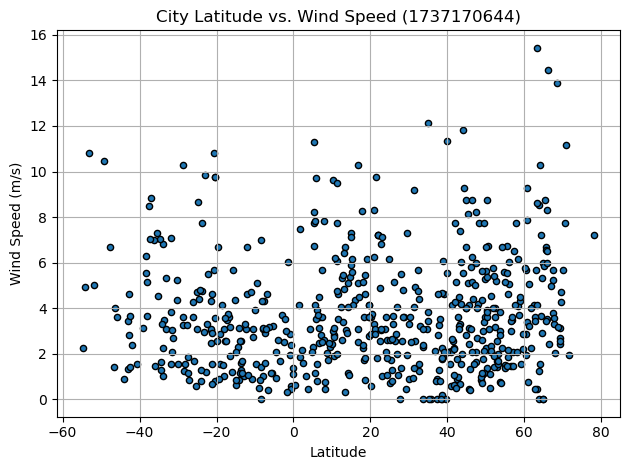

In [25]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout() 

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show() 

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,maryville,35.7565,-83.9705,279.87,68,100,0.00,US,1737171237
4,wailua homesteads,22.0669,-159.3780,296.59,76,0,7.20,US,1737171198
6,beyneu,45.3167,55.2000,273.81,98,100,5.11,KZ,1737171241
7,olonkinbyen,70.9221,-8.7187,267.22,90,100,11.17,SJ,1737171243
8,kamenka,51.3223,42.7678,273.61,98,100,4.54,RU,1737171244


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,villa regina,-39.1000,-67.0667,297.58,23,74,3.13,AR,1737171234
1,bel ombre,-4.6167,55.4167,299.06,89,40,2.06,SC,1737171236
3,adamstown,-25.0660,-130.1015,297.95,88,6,4.71,PN,1737171238
5,tacuarembo,-31.7333,-55.9833,297.33,63,7,3.82,UY,1737171172
11,ancud,-41.8697,-73.8203,283.41,84,31,2.36,CL,1737171247


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8634549124714823


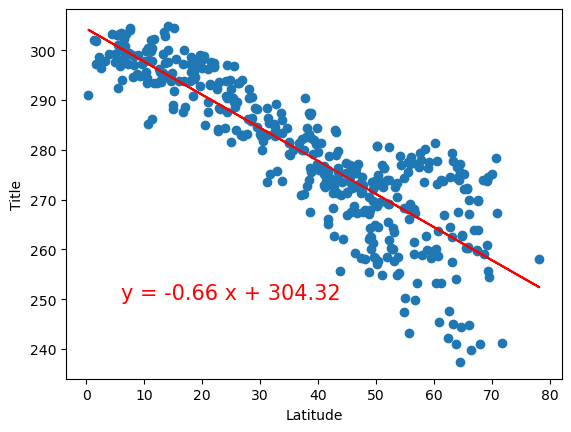

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,250)) 

The r-squared is: 0.49840852847578093


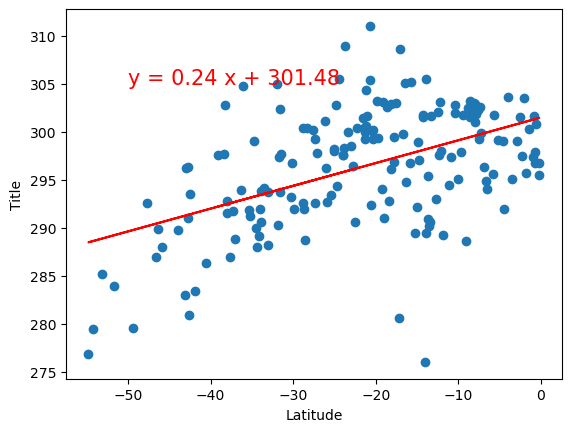

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,305)) 

**Discussion about the linear relationship:** The northern hemisphere has a very strong negative correlation. 
The southern hemisphere has a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.5298235166465988


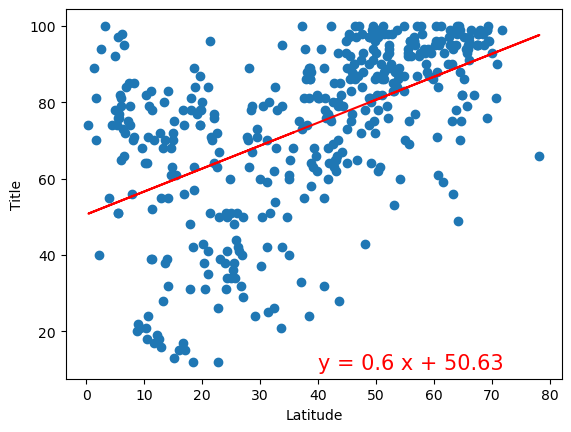

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.1730603957716444


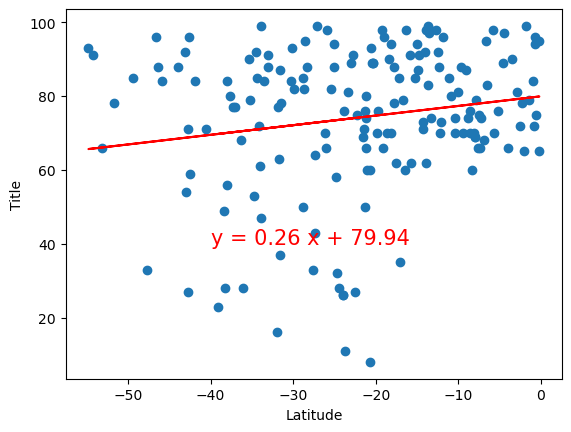

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-40,40)) 

**Discussion about the linear relationship:** The northern hemisphere has a strong positive correlation. 
The southern hemisphere has a weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.31143964074200925


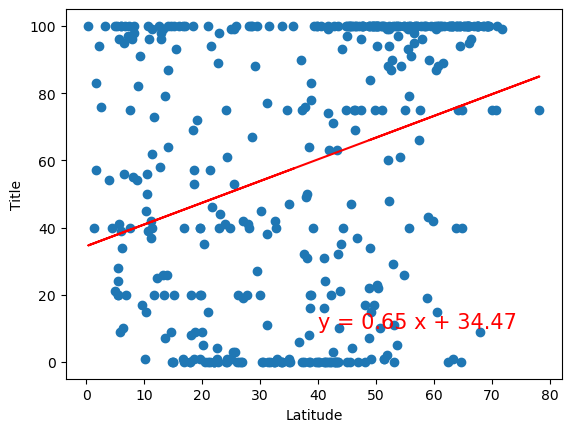

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.3816003611433936


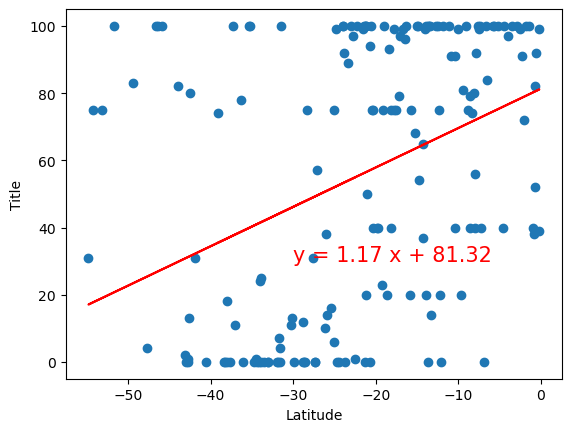

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** The northern hemisphere has a positive correlation. 
The southern hemisphere has a stronger positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06044490174340877


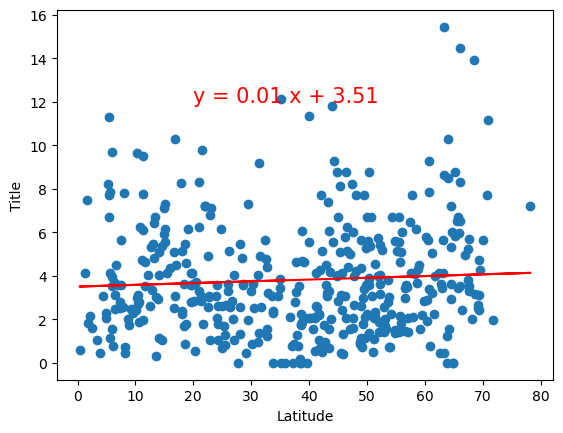

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (20,12)) 

The r-squared is: -0.3143344840936448


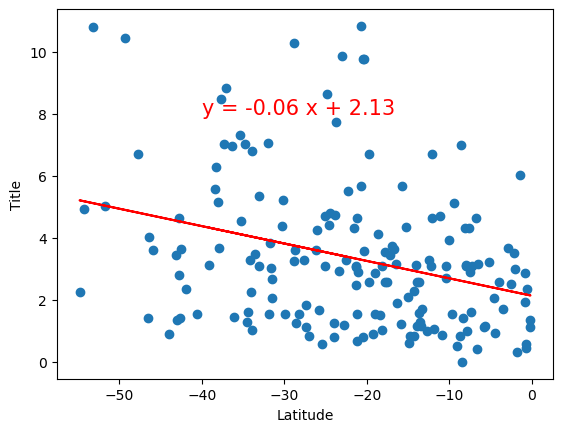

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-40,8))

**Discussion about the linear relationship:** The northern hemisphere has a very weak positive/no correlation. 
The southern hemisphere has a negative correlation.